<a href="https://colab.research.google.com/github/JesusMe001/An-lisis-Integrado-de-Datos-sobre-C-ncer-y-Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importamos las librerías


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importar el data set


### Carga los datos del archivo CSV en un DataFrame de pandas y luego muestra las primeras 5 filas y las 5 ultimas del DataFrame

In [ ]:
dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/diabetes.csv')

**Embarazos/ Glucosa/ Presión arterial/ Espesor de la piel/ Insulina/ BMI (el indice de masa coorporal)/DiabetesPedigreeFunction/Edad/Resultado(salida)**


**DiabetesPedigreeFunction** función que califica la probabilidad de diabetes según los antecedentes familiares.

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.count()   # conocer la cantidad que hay en cada columna

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [ ]:
dataset.isnull().sum()  #verificar si no hay datos nulo

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Los datos parecen limpios. Así que podemos empezar con el análisis.

# Basico EDA

Este analisis podemos observar que los datos de la varieble independiente se divide en 2, "0 y 1" para el Outcome nos da a entenerder que 0 son lo que no tienen nada y 1 son los que tiene, y en este caso hay mas datos de personas sanas.

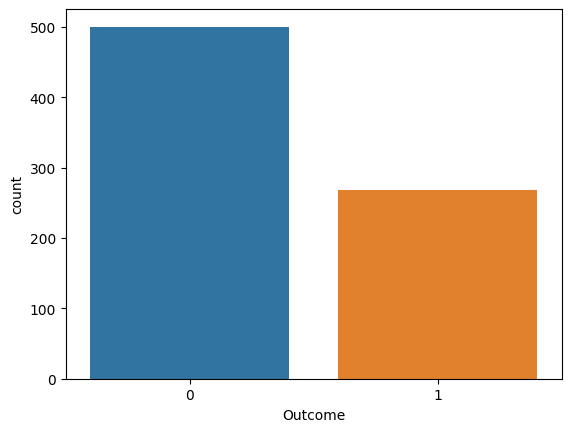

In [ ]:
sns.countplot(x='Outcome',data=dataset)
plt.show()

In [ ]:
outcome=dataset['Outcome']
data=dataset[dataset.columns[:8]]


# Dividir el data set en conjunto de entrenamiento y conjunto de testing


La función train_test_splitse encuentra en la biblioteca sklearn.model_selectionde scikit-learn y se utiliza para dividir un conjunto de datos en dos subconjuntos: uno para entrenamiento y otro para pruebas.

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(dataset,test_size=0.25,random_state=0,stratify=dataset['Outcome'])# stratify the outcome es decir la división del conjunto de datos en conjuntos de entrenamiento y prueba
X_train=train[train.columns[:8]]   #las primeras 8 columnas del conjunto de entrenamiento.
X_test=test[test.columns[:8]]       #primeras 8 columnas del conjunto de prueba
y_train=train['Outcome']              #los resultados esperados correspondientes a las muestras de entrenamiento
y_test=test['Outcome']

In [ ]:
dataset.shape    # mi datos originales eran de

(768, 9)

In [ ]:
train.shape   #con entrenamiento de 75% hay lo siguiente

(576, 9)

In [ ]:
test.shape    # con prueba con 25% es lo siguiente

(192, 9)

In [ ]:
y_train.head()

432    0
453    0
706    1
606    1
118    0
Name: Outcome, dtype: int64

# Escalado de variables

Es importante en muchos algoritmos de aprendizaje automático para garantizar que todas las características tendrán una escala similar

In [ ]:
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

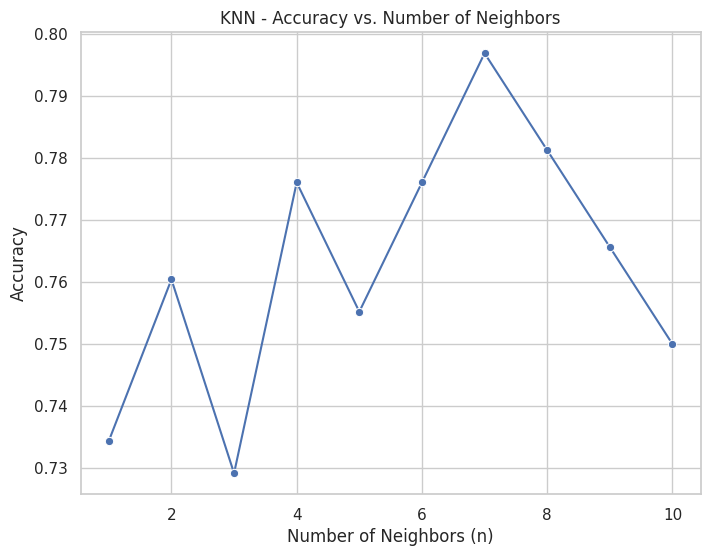

Accuracies for different values of n are: [0.734375, 0.7604166666666666, 0.7291666666666666, 0.7760416666666666, 0.7552083333333334, 0.7760416666666666, 0.796875, 0.78125, 0.765625, 0.75]


In [ ]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Supongamos que ya has dividido tus datos en conjuntos de entrenamiento y prueba (X_train, X_test, y_train, y_test)

a_index = list(range(1, 11))
accuracy_values = []

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = metrics.accuracy_score(prediction, y_test)
    accuracy_values.append(accuracy)

# Crear un DataFrame para facilitar el uso de Seaborn
df = pd.DataFrame({'n_neighbors': a_index, 'accuracy': accuracy_values})

# Utilizar Seaborn para trazar la precisión en función del número de vecinos
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(x='n_neighbors', y='accuracy', data=df, marker='o')
plt.title('KNN - Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Accuracy')
plt.show()

print('Accuracies for different values of n are:', accuracy_values)

  p = 2   permite especificar el tipo de distancia a utilizar para medir la proximidad entre las muestras de datos

In [ ]:

algoritmos = {
              'Logistic Regression': LogisticRegression(random_state=42),
              'Descition Tree': DecisionTreeClassifier(criterion='entropy', random_state=42),
              'SVM': SVC(kernel = "rbf", C=10, random_state=42, probability=True),
              'Random Forest': RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 42),
              'KNN': KNeighborsClassifier(n_neighbors = 7, metric = "minkowski", p = 2),
              'Naive Bayes': GaussianNB(),
              }


#funcion para evaluar metricas
def evaluacion(y_true, y_pred, metricas):
    res = {}
    for nombre, funcion in metricas.items():
        res[nombre] = np.round(funcion(y_true, y_pred),4)
    return res

k=7

metricas = {
  'ACC':   metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='macro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='macro'),           #average='macro'para calcular la recuperación promedio en cada clase y devolver la media no ponderada.
  'ROC':    lambda y_true, y_pred:
            metrics.roc_auc_score(y_true, y_pred, average='macro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='macro'),
  'MSE':    lambda y_true, y_pred:
            metrics.mean_squared_error(y_true, y_pred),           #No se utiliza averageen esta métrica, ya que se trata de un problema de regresión
  'MAE':    lambda y_true, y_pred:
            metrics.mean_absolute_error(y_true, y_pred)
}

y_pred = {}
headers = ['METRICS']
ACC,PREC,RECALL,F1,ROC,MSE,MAE = ['ACCURACY'],['PRECISION'],['RECALL'],['F1'],['ROC'],['MSE'],['MAE']

for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, X_train, y_train, cv=KFold(n_splits=k, shuffle=True, random_state=42))
    results = evaluacion(y_train, y_pred[nombre], metricas)
    headers.append(nombre)
    ACC.append(results['ACC'])
    PREC.append(results['PREC'])
    RECALL.append(results['RECALL'])
    F1.append(results['F1'])
    ROC.append(results['ROC'])
    MSE.append(results['MSE'])
    MAE.append(results['MAE'])

my_data = [tuple(ACC), tuple(PREC), tuple(RECALL), tuple(F1), tuple(ROC), tuple(MSE), tuple(MAE)]
print(tabulate(my_data, headers=headers))


METRICS      Logistic Regression    Descition Tree     SVM    Random Forest     KNN    Naive Bayes
---------  ---------------------  ----------------  ------  ---------------  ------  -------------
ACCURACY                  0.776             0.6944  0.724            0.7708  0.7066         0.7465
PRECISION                 0.7618            0.6655  0.6947           0.7501  0.6738         0.7218
RECALL                    0.7276            0.6684  0.6853           0.7328  0.6558         0.7038
F1                        0.7382            0.6668  0.689            0.7394  0.6611         0.7102
ROC                       0.7276            0.6684  0.6853           0.7328  0.6558         0.7038
MSE                       0.224             0.3056  0.276            0.2292  0.2934         0.2535
MAE                       0.224             0.3056  0.276            0.2292  0.2934         0.2535


eLa tabla proporciona métricas de rendimiento para diferentes modelos de aprendizaje automático en diversas categorías. Aquí está la interpretación de estas métricas:

Logistic Regression:

Accuracy (Exactitud): 77.6%
Precision (Precisión): 76.18%
Recall (Recuperación): 72.76%
F1 Score (Puntuación F1): 73.82%
ROC AUC: 72.76%
MSE (Error Cuadrático Medio): 22.4%
MAE (Error Absoluto Medio): 22.4%

Decision Tree:

Accuracy: 69.44%
Precision: 66.55%
Recall: 66.84%
F1 Score: 66.68%
ROC AUC: 66.84%
MSE: 30.56%
MAE: 30.56%

SVM (Support Vector Machine):

Accuracy: 72.4%
Precision: 69.47%
Recall: 68.53%
F1 Score: 68.9%
ROC AUC: 68.53%
MSE: 27.6%
MAE: 27.6%

Random Forest:

Accuracy: 77.08%
Precision: 75.01%
Recall: 73.28%
F1 Score: 73.94%
ROC AUC: 73.28%
MSE: 22.92%
MAE: 22.92%

KNN (K-Nearest Neighbors):

Accuracy: 70.66%
Precision: 67.38%
Recall: 65.58%
F1 Score: 66.11%
ROC AUC: 65.58%
MSE: 29.34%
MAE: 29.34%
Naive Bayes:

Accuracy: 74.65%
Precision: 72.18%
Recall: 70.38%
F1 Score: 71.02%
ROC AUC: 70.38%
MSE: 25.35%
MAE: 25.35%


Estas métricas proporcionan una visión general del rendimiento de cada modelo en la tarea específica para la que fueron entrenados. La elección del modelo dependerá de la importancia relativa de estas métricas en el contexto de tu problema y los requisitos específicos de la aplicación. Por ejemplo, si la precisión es crítica, podrías preferir el modelo de Regresión Logística o Random Forest en este caso.

fue el mejorLogistic Regression 0.7618  pero el que le seguia era el Random Forest 0.7501

# Evaluar los Algoritmos con el conjunto de TEST

# Comparacion de los acurracy de **TEST**

# Elaborar una matriz de confusión

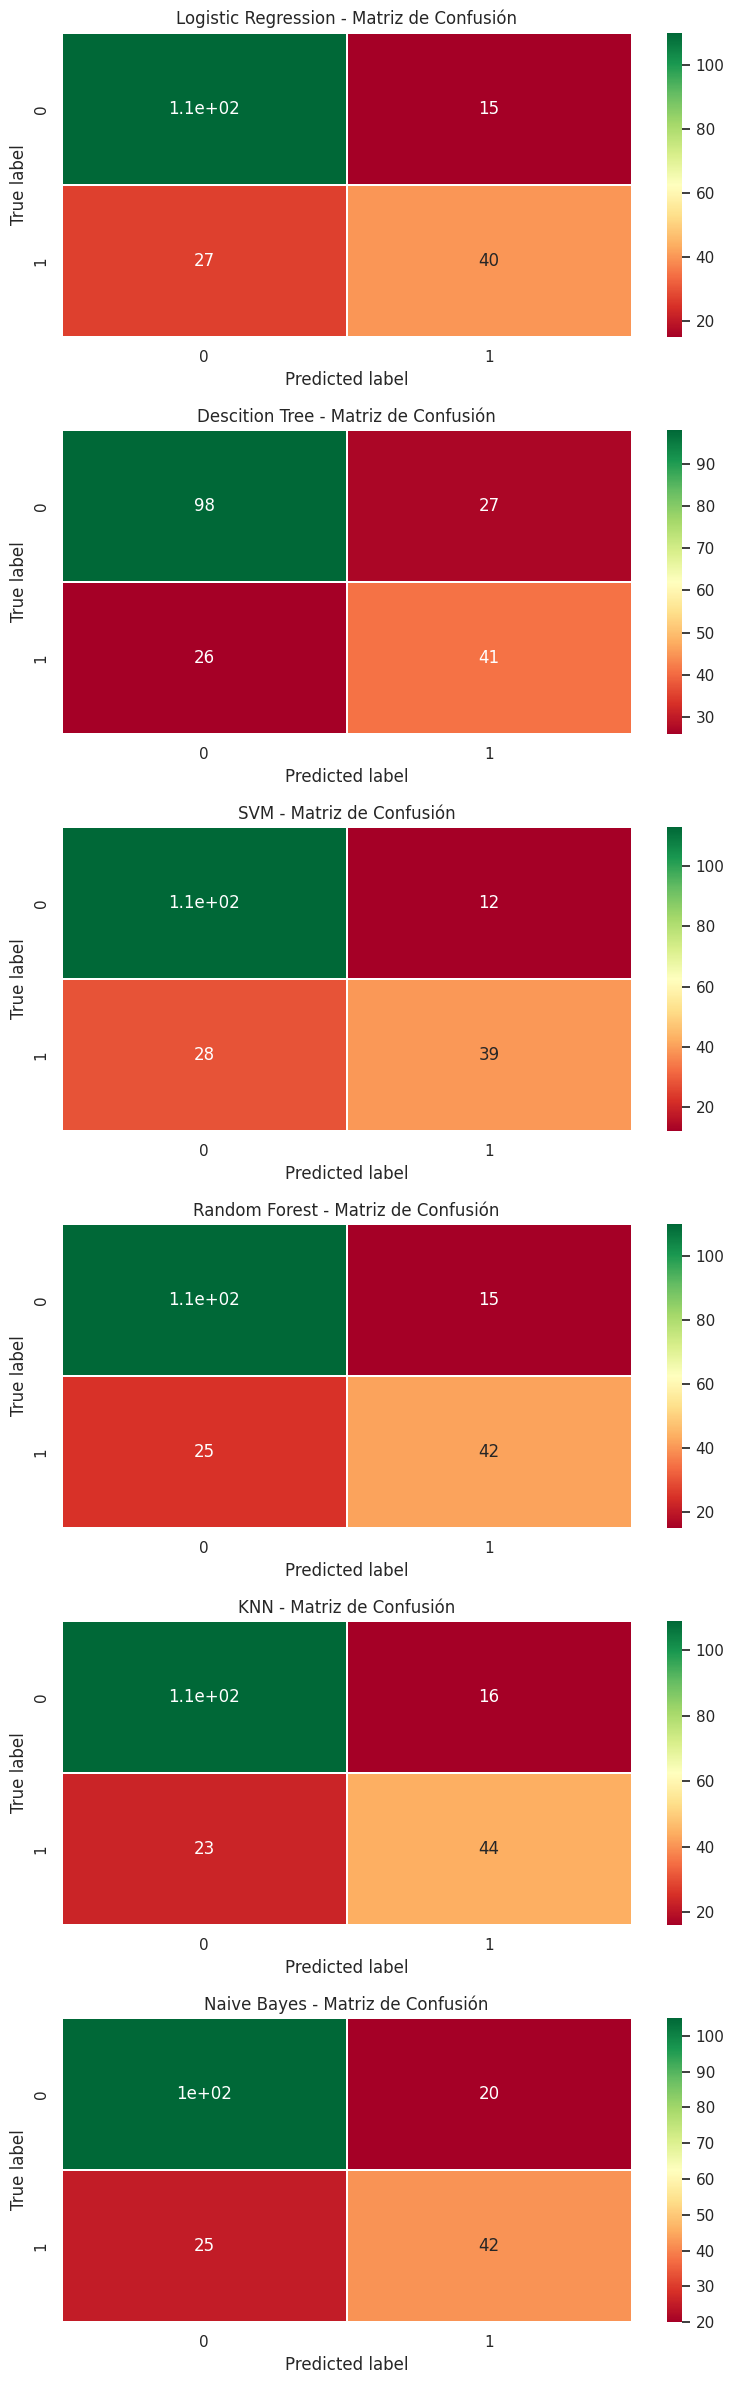

In [ ]:
fig, axs = plt.subplots(nrows=len(algoritmos), ncols=1, figsize=(8, 4 * len(algoritmos)))

for i, (nombre, alg) in enumerate(algoritmos.items()):
    y_pred = alg.fit(X_train, y_train).predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Utilizar subgráficas para mostrar todas las matrices de confusión en una sola figura
    sns.heatmap(cm, annot=True, cmap='RdYlGn', linewidths=0.2, ax=axs[i])

    axs[i].set_title(nombre + ' - Matriz de Confusión')
    axs[i].set_xlabel('Predicted label')
    axs[i].set_ylabel('True label')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

# Correlation Matrix

La "Correlation Matrix" (Matriz de conexiones) es una matriz que muestra la relación de conexiones entre pares de variables en un conjunto de datos. Es una herramienta utilizada en el análisis exploratorio de datos y en la estadística descriptiva para comprender cómo se relacionan entre sí las diferentes variables.

Un valor de 1 indica una conexión positiva perfecta, lo que significa que las variables están altamente relacionadas de manera directa.
Un valor de -1 indica una conexión negativa perfecta, lo que significa que las variables están altamente relacionadas de manera inversa.
Un valor de 0 indica que no hay correlación lineal entre las variables, lo que significa que no hay una relación lineal clara entre ellas.

la matriz son la variable independiente que es la de los resultaso

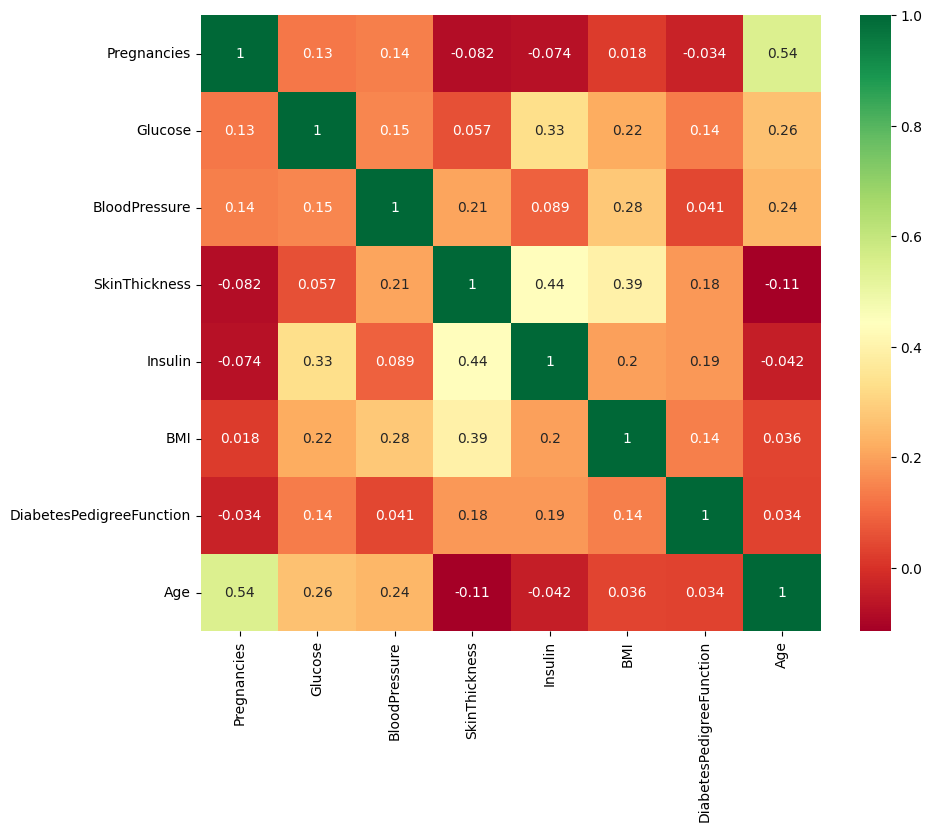

In [ ]:
sns.heatmap(diab[diab.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

la matriz con todas sus columnas

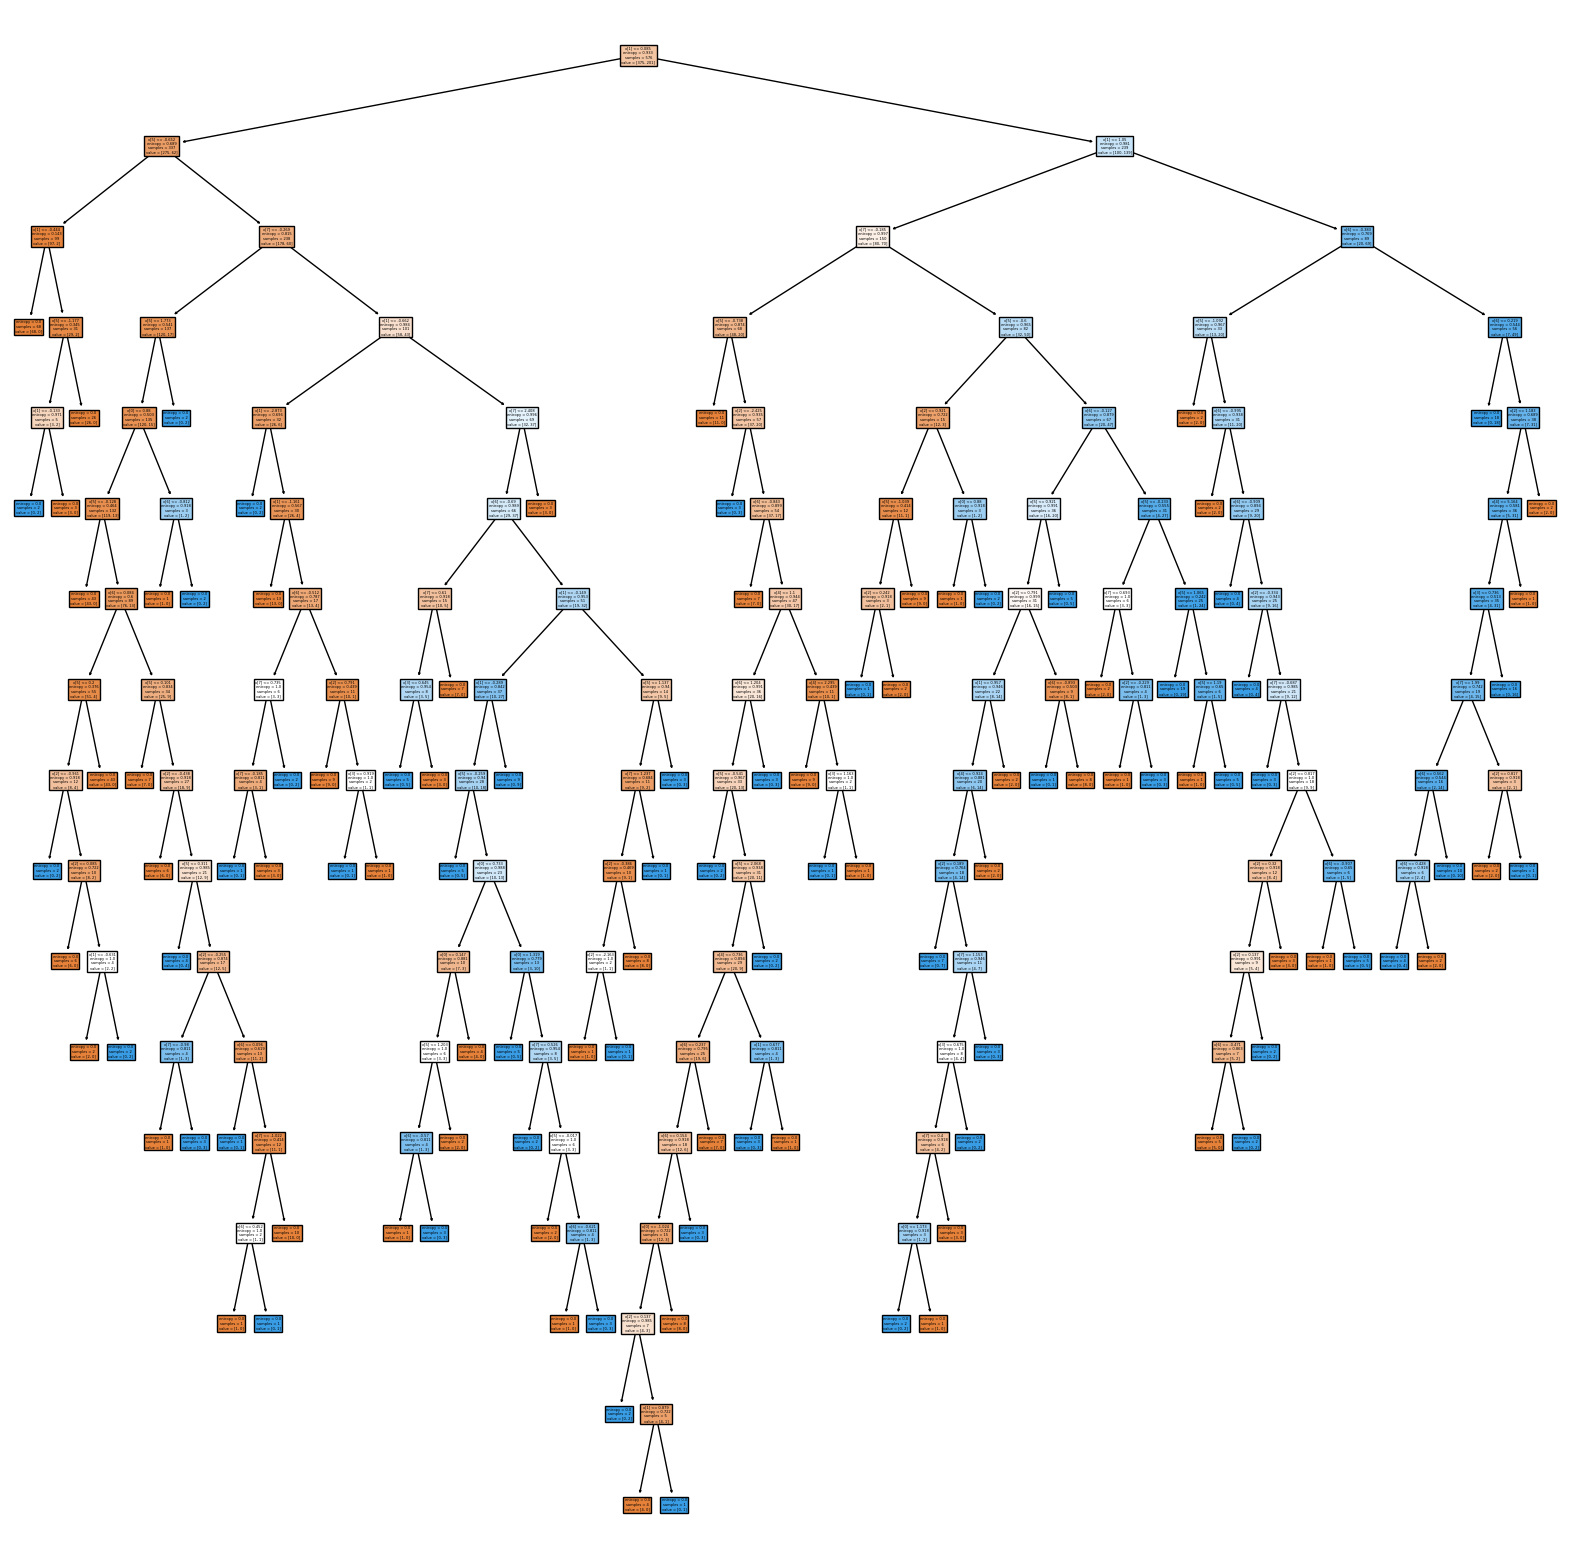

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

classifier = algoritmos['Descition Tree']
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura según tus necesidades
plot_tree(classifier, filled=True)
plt.savefig('arbol.png')
